### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [22]:
import numpy as np

m = np.arange(12).reshape((3,4))
row_mean=np.zeros((m.shape[0],1))
column_mean=np.zeros(m.shape[1])
for i in range(m.shape[0]):
    row_mean[i]=np.mean(m[i,:])
for i in range(m.shape[1]):
    column_mean[i]=np.mean(m[:,i])
print("The matrix: \n {0} \n".format(m))
print("Row mean: \n",row_mean)
print("Column mean: \n",column_mean)
print("Overall mean: \n",np.mean(m))

The matrix: 
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 

Row mean: 
 [[1.5]
 [5.5]
 [9.5]]
Column mean: 
 [4. 5. 6. 7.]
Overall mean: 
 5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [23]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

print("Outer built-in function: \n",np.outer(u,v))
print("Outer w/ list comprehension: \n",np.array([[i*j for j in v] for i in u]))
print("Outer w/ broadcasting: \n",u[:,np.newaxis]*v)

Outer built-in function: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Outer w/ list comprehension: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Outer w/ broadcasting: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [24]:
import numpy.random as npr

npr.seed(123)
a=npr.random((10,6))
print("Original matrix: \n",a,"\n")
a[np.any(np.array(a <= 0.1, "bool"),axis=1),:]=0
print("Modified matrix: \n",a)

Original matrix: 
 [[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897 0.42310646]
 [0.9807642  0.68482974 0.4809319  0.39211752 0.34317802 0.72904971]
 [0.43857224 0.0596779  0.39804426 0.73799541 0.18249173 0.17545176]
 [0.53155137 0.53182759 0.63440096 0.84943179 0.72445532 0.61102351]
 [0.72244338 0.32295891 0.36178866 0.22826323 0.29371405 0.63097612]
 [0.09210494 0.43370117 0.43086276 0.4936851  0.42583029 0.31226122]
 [0.42635131 0.89338916 0.94416002 0.50183668 0.62395295 0.1156184 ]
 [0.31728548 0.41482621 0.86630916 0.25045537 0.48303426 0.98555979]
 [0.51948512 0.61289453 0.12062867 0.8263408  0.60306013 0.54506801]
 [0.34276383 0.30412079 0.41702221 0.68130077 0.87545684 0.51042234]] 

Modified matrix: 
 [[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897 0.42310646]
 [0.9807642  0.68482974 0.4809319  0.39211752 0.34317802 0.72904971]
 [0.         0.         0.         0.         0.         0.        ]
 [0.53155137 0.53182759 0.63440096 0.84943179 0.72445532 0.611

In [25]:
#import numpy.random as npr
#npr.seed(123)
#a=npr.random((10,6))
#print("Original matrix: \n",a,"\n")
#for i in range(10):
#    if np.any(np.array(a <= 0.1, "bool")[i,:]): a[i,:]=0
#print("Modified matrix: \n",a)

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

First point: 
 [0.57119866 1.20586385 1.84052903 2.47519421 3.10985939 3.74452458
 4.37918976 5.01385494 5.64852012 6.28318531]
Second point: 
 [6.28318531 6.21971879 6.15625227 6.09278575 6.02931923 5.96585272
 5.9023862  5.83891968 5.77545316 5.71198664 5.64852012 5.58505361
 5.52158709 5.45812057 5.39465405 5.33118753 5.26772102 5.2042545
 5.14078798 5.07732146 5.01385494 4.95038842 4.88692191 4.82345539
 4.75998887 4.69652235 4.63305583 4.56958931 4.5061228  4.44265628
 4.37918976 4.31572324 4.25225672 4.1887902  4.12532369 4.06185717
 3.99839065 3.93492413 3.87145761 3.8079911  3.74452458 3.68105806
 3.61759154 3.55412502 3.4906585  3.42719199 3.36372547 3.30025895
 3.23679243 3.17332591 3.10985939 3.04639288 2.98292636 2.91945984
 2.85599332 2.7925268  2.72906028 2.66559377 2.60212725 2.53866073
 2.47519421 2.41172769 2.34826118 2.28479466 2.22132814 2.15786162
 2.0943951  2.03092858 1.96746207 1.90399555 1.84052903 1.77706251
 1.71359599 1.65012947 1.58666296 1.52319644 1.459729

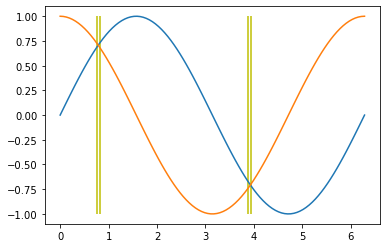

In [26]:
import matplotlib.pyplot as plt

a=np.linspace(0,2*np.pi,100)
#print("Original array: \n",a)
print("First point: \n", a[9::10])
print("Second point: \n", a[::-1])
print("Third point: \n", a[abs(np.sin(a)-np.cos(a))<0.1])
%matplotlib inline 
plt.vlines(a[abs(np.sin(a)-np.cos(a))<0.1],-1,1,colors="y")
plt.plot(a, np.sin(a),a,np.cos(a));

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [27]:
a=np.outer(np.arange(1,11),np.arange(1,11))
print("The matrix: \n",a)
#print(np.diag(a,-1))
print("Trace: ", np.sum(np.diag(a)))
print("Anti-diagonal: \n",np.diag(a[::-1,]))
print("Diagonal w/ offset: \n", np.diag(a,-1))

The matrix: 
 [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
Trace:  385
Anti-diagonal: 
 [10 18 24 28 30 30 28 24 18 10]
Diagonal w/ offset: 
 [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [28]:
a=np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
grid=abs(a[:,np.newaxis]-a)
print("The 2-D grid: \n",grid,"\n")
print("The 2-D grid in km: \n",grid*1.609344)

The 2-D grid: 
 [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]] 

The 2-D grid in km: 
 [[   0.        318.650112  487.631232 1184.477184 1401.738624 1890.9792
  2373.7824   2484.827136 3078.675072 3939.674112]
 [ 318.650112    0.        168.98112   865.827072 1083.088512 1572.329088
  2055.132288 2166.177024 2760.02496  3621.024   ]
 [ 487.631232  168.98112     0.        696.845952  914.107392 1403.347968
  1886.151168 1997.195904 2591.04384  3452.04288 ]
 [1184.477184  865.827072  696.845952    0.        217.2

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [29]:
def eratosthenes(N):
    mask=np.ones(N,"bool")
    #print(mask)
    i=2
    while i*i<N:
        mask[2*i::i]=False 
        i+=1
    mask[:2]=False
    return np.arange(N)[mask]

print(eratosthenes(100))
#%timeit eratosthenes(100000)
# N=100     9.08 µs ± 406 ns per loop
# N=1000    23.7 µs ± 143 ns per loop
# N=10000   104 µs ± 1.4 µs per loop
# N=100000  846 µs ± 2.15 µs per loop

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

Matrix of walkers x steps: 
 [[-1  1 -1 ... -1  1 -1]
 [ 1  1 -1 ...  1 -1 -1]
 [ 1  1 -1 ... -1 -1  1]
 ...
 [-1  1  1 ... -1  1  1]
 [-1 -1 -1 ...  1 -1 -1]
 [-1  1 -1 ... -1  1 -1]] 

Matrix of actual distances: 
 [[ -1   0  -1 ...  -4  -3  -4]
 [  1   2   1 ...  18  17  16]
 [  1   2   1 ...  16  15  16]
 ...
 [ -1   0   1 ... -18 -17 -16]
 [ -1  -2  -3 ...   4   3   2]
 [ -1   0  -1 ...  24  25  24]] 

Matrix of squared distances: 
 [[  1   0   1 ...  16   9  16]
 [  1   4   1 ... 324 289 256]
 [  1   4   1 ... 256 225 256]
 ...
 [  1   0   1 ... 324 289 256]
 [  1   4   9 ...  16   9   4]
 [  1   0   1 ... 576 625 576]] 



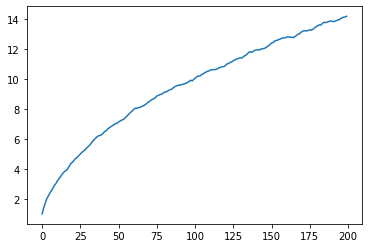

In [35]:
npr.seed(123)

#grid=npr.choice((-1,1),(1000,200)) #simpler expression but less efficient
grid=npr.randint(2,size=(1000,200))
grid[grid==0]=-1
print("Matrix of walkers x steps: \n",grid,"\n")

#%timeit grid=npr.randint(2,size=(1000,200)) #754 µs ± 4.91 µs per loop
#%timeit grid[grid==0]=-1                    #73.3 µs ± 944 ns per loop
#%timeit grid=npr.choice((-1,1),(1000,200))  #1.06 ms ± 5.12 µs per loop

# actual walking distance for each walker
distances=np.array([[np.sum(grid[i,:j+1]) for j in range(grid.shape[1])] for i in range(grid.shape[0])])
print("Matrix of actual distances: \n",distances,"\n")
    
# square of the previous array
print("Matrix of squared distances: \n",distances**2,"\n")

# mean squared distance
mean_2distances=np.array([np.mean(distances[:,i]**2) for i in range(distances.shape[1])])

%matplotlib inline
plt.plot(np.arange(200),mean_2distances**.5);


9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

Check the content with cat: 

# year	hare	lynx	carrot
1900	30e3	4e3	48300
1901	47.2e3	6.1e3	48200
1902	70.2e3	9.8e3	41500
1903	77.4e3	35.2e3	38200
1904	36.3e3	59.4e3	40600
1905	20.6e3	41.7e3	39800
1906	18.1e3	19e3	38600
1907	21.4e3	13e3	42300
1908	22e3	8.3e3	44500
1909	25.4e3	9.1e3	42100
1910	27.1e3	7.4e3	46000
1911	40.3e3	8e3	46800
1912	57e3	12.3e3	43800
1913	76.6e3	19.5e3	40900
1914	52.3e3	45.7e3	39400
1915	19.5e3	51.1e3	39000
1916	11.2e3	29.7e3	36700
1917	7.6e3	15.8e3	41800
1918	14.6e3	9.7e3	43300
1919	16.2e3	10.1e3	41300
1920	24.7e3	8.6e3	47300

Statistical properties of hares: 
sum : 715700.0
min : 7600.0
argmin : 17
mean : 34080.95238095238
median : 25400.0
std : 20897.906458089667

Statistical properties of lynxes: 
sum : 423500.0
min : 4000.0
argmin : 0
mean : 20166.666666666668
median : 12300.0
std : 16254.591536908763

Statistical properties of carrots: 
sum : 890400.0
min : 36700.0
argmin : 16
mean : 42400.0
median : 41800.0
std : 3322.5062255844787

Highest population speci

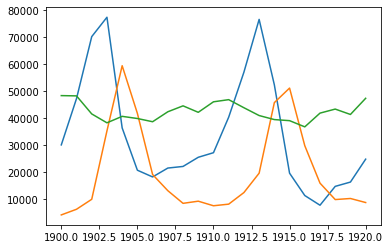

In [87]:
print("Check the content with cat: \n")
! cat populations.txt

data = np.loadtxt('populations.txt')
year, hares, lynxes, carrots = data.T

species = {
    'hares': hares,
    'lynxes': lynxes,
    'carrots': carrots,
}

%matplotlib inline
plt.plot(year,hares,year,lynxes,year,carrots);

for x in species:
    print("\nStatistical properties of %s: "%(x))
    for function in ['sum','min','argmin','mean','median','std']:
        print (function,":", getattr(np, function)(species[x]))
        
print("\nHighest population species per year:")
for x in range(len(year)):
    if (np.argmax(data[x,:]))==3: print("%i: carrots"%(year[x]))
    elif (np.argmax(data[x,:]))==2: print("%i: lynxes"%(year[x]))
    else: print("%i: hares"%(year[x]))